In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Подготовка данных

In [ ]:
# скачали и посмотрели на выборку
df = pd.read_csv('/content/drive/MyDrive/_Проекты/Personal_projects/Layout detection/Показания.csv', sep=";")
#df = pd.read_csv('/content/drive/MyDrive/_Проекты/Personal_projects/Layout detection/data/values.csv', sep=";")
print(df.shape)
df

(188147, 8)


,Номер ЛС,Расчетный месяц,Показание,Расход,Расчетный месяц.1,Дата показаний,Тип показаний,Состояние
0,905020000001,2008-10-01 00:00:00.000,6771,0,01.10.2008,12.10.2008,Установка,Расчетное
1,905020000001,2008-11-01 00:00:00.000,6771,0,01.11.2008,14.11.2008,Аб,Расчетное
2,905020000001,2008-12-01 00:00:00.000,6923,152,01.12.2008,15.12.2008,Аб,Расчетное
3,905020000001,2009-01-01 00:00:00.000,7444,200,01.01.2009,16.01.2009,Аб,Расчетное
4,905020000001,2009-01-01 00:00:00.000,7244,321,01.01.2009,15.01.2009,Аб,Расчетное
...,...,...,...,...,...,...,...,...
188142,905020008996,2021-03-01 00:00:00.000,13415,0,01.03.2021,16.03.2021,КП/П,Удаленное
188143,905020008996,2021-03-01 00:00:00.000,13415,0,01.03.2021,16.03.2021,КП/П,Удаленное
188144,905020008996,2021-03-01 00:00:00.000,13415,0,01.03.2021,16.03.2021,КП/П,Удаленное
188145,905020008996,2021-03-01 00:00:00.000,13415,0,01.03.2021,16.03.2021,КП/П,Удаленное


In [ ]:
# сгруппировал по типам потребителей и изучили характерисики группы
dfGroup = df.groupby('Состояние')
dfGroup['Состояние'].describe()

,count,unique,top,freq
Состояние,,,,
Расчетное,129535,1,Расчетное,129535
Удаленное,58612,1,Удаленное,58612


In [ ]:
# сгруппировал по типам потребителей и изучили характерисики группы
dfGroup = df.groupby('Тип показаний')
dfGroup['Тип показаний'].describe()

,count,unique,top,freq
Тип показаний,,,,
WEB,187,1,WEB,187
Аб,85256,1,Аб,85256
ДС,798,1,ДС,798
КП,42853,1,КП,42853
КП/П,56171,1,КП/П,56171
Коррекция,13,1,Коррекция,13
Отключение,46,1,Отключение,46
Снятие,458,1,Снятие,458
Установка,1369,1,Установка,1369


In [ ]:
df = df.loc[df['Тип показаний'] == 'Аб']
#df = df.loc[df['Состояние'] == 'Удаленное']
#del df['Расчетный месяц'], df['Расход'], df['Тип показаний'], df['Состояние'], df['Дата показаний']
df = df.rename(columns={'Номер ЛС':'Consumer', 'Показание':'Values', 'Расчетный месяц.1':'Month'})
df = df.drop_duplicates(subset=['Consumer', 'Month'], keep='first')
df[40:80]

,Consumer,Расчетный месяц,Values,Расход,Month,Дата показаний,Тип показаний,Состояние
46,905020000001,2012-06-01 00:00:00.000,16928,453,01.06.2012,15.06.2012,Аб,Расчетное
47,905020000001,2012-07-01 00:00:00.000,17308,380,01.07.2012,11.07.2012,Аб,Расчетное
48,905020000001,2012-08-01 00:00:00.000,17604,296,01.08.2012,09.08.2012,Аб,Расчетное
49,905020000001,2012-09-01 00:00:00.000,17944,340,01.09.2012,13.09.2012,Аб,Расчетное
50,905020000001,2012-10-01 00:00:00.000,18203,259,01.10.2012,10.10.2012,Аб,Расчетное
51,905020000001,2012-11-01 00:00:00.000,18341,138,01.11.2012,13.11.2012,Аб,Расчетное
52,905020000001,2012-12-01 00:00:00.000,18412,71,01.12.2012,10.12.2012,Аб,Расчетное
53,905020000001,2013-01-01 00:00:00.000,18444,32,01.01.2013,11.01.2013,Аб,Расчетное
56,905020000001,2013-02-01 00:00:00.000,398,398,01.02.2013,13.02.2013,Аб,Расчетное
57,905020000001,2013-03-01 00:00:00.000,865,467,01.03.2013,11.03.2013,Аб,Расчетное


In [ ]:
consumers = df['Consumer'].unique()
consumers[30], consumers.shape

(905020000645, (971,))

,Consumer,Расчетный месяц,Values,Расход,Month,Дата показаний,Тип показаний,Состояние
50,905020001827,2013-12-01 00:00:00.000,367,99,01.12.2013,12.12.2013,Аб,Расчетное
51,905020001827,2014-01-01 00:00:00.000,667,300,01.01.2014,21.01.2014,Аб,Расчетное
52,905020001827,2014-02-01 00:00:00.000,893,226,01.02.2014,12.02.2014,Аб,Расчетное
53,905020001827,2014-03-01 00:00:00.000,1103,210,01.03.2014,19.03.2014,Аб,Расчетное
54,905020001827,2014-04-01 00:00:00.000,1278,175,01.04.2014,22.04.2014,Аб,Расчетное
55,905020001827,2014-05-01 00:00:00.000,1405,127,01.05.2014,16.05.2014,Аб,Расчетное
56,905020001827,2014-06-01 00:00:00.000,1455,50,01.06.2014,18.06.2014,Аб,Расчетное
57,905020001827,2014-07-01 00:00:00.000,1602,147,01.07.2014,30.07.2014,Аб,Расчетное
58,905020001827,2014-08-01 00:00:00.000,1690,88,01.08.2014,20.08.2014,Аб,Расчетное
59,905020001827,2014-09-01 00:00:00.000,1800,110,01.09.2014,18.09.2014,Аб,Расчетное


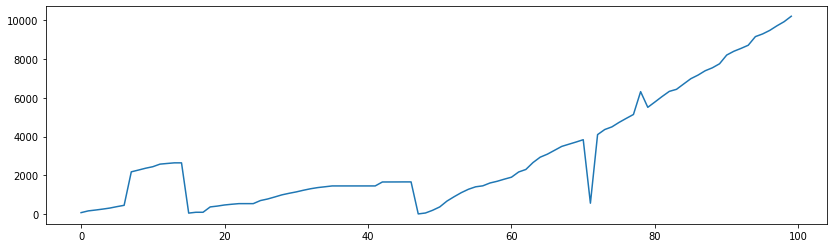

In [ ]:
Consumer = df.loc[df['Consumer'] == 905020001827]
# аномалии определятся при анализе процентного отклонения в потреблении
#Consumer = Consumer['Values'].pct_change()
Consumer = Consumer.reset_index(drop=True)
Consumer['Values'].plot(figsize=(14, 4))
Consumer[50:]

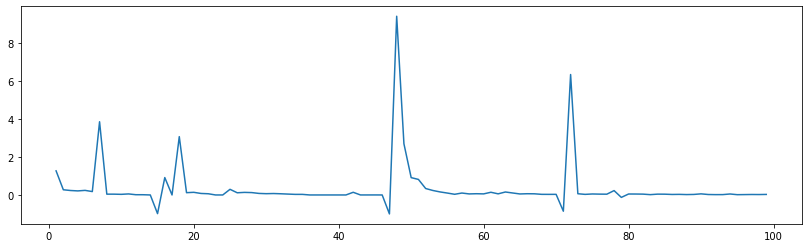

In [ ]:
Consumer['Values'].pct_change().plot(figsize=(14, 4))

In [ ]:
# сгруппировал по типам потребителей и изучили характерисики группы
Consumer.loc[Consumer['Состояние'] == 'Удаленное']

,Consumer,Расчетный месяц,Values,Расход,Month,Дата показаний,Тип показаний,Состояние
71,905020001827,2015-09-01 00:00:00.000,559,96722,01.09.2015,09.09.2015,Аб,Удаленное
78,905020001827,2016-04-01 00:00:00.000,6319,1179,01.04.2016,14.04.2016,Аб,Удаленное
85,905020001827,2017-01-01 00:00:00.000,6988,103,01.01.2017,26.01.2017,Аб,Удаленное


## Обьединим несколько потребителей, чтобы проанализировать все разом

In [ ]:
data = pd.DataFrame()

In [ ]:
for i in range(8):
    Consumer = df.loc[df['Consumer'] == consumers[i]]
    Consumer = Consumer.reset_index(drop=True)
    x1  = Consumer['Values'].pct_change()
    data[consumers[i]] = x1
del data[905020000246]
data

,905020000001,905020000020,905020000106,905020000108,905020000201,905020000210,905020000274
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.022449,0.118402,0.200000,0.001587,NaN,0.000000,0.723077
2,0.075256,0.300652,4.000000,0.000792,inf,0.000000,0.276786
3,0.015583,0.082598,0.933333,0.000792,1.787860,0.000000,0.545455
4,0.023810,0.179444,0.000000,0.000791,2.819262,10.641256,0.266968
...,...,...,...,...,...,...,...
86,0.000723,0.012135,NaN,NaN,NaN,NaN,NaN
87,0.000460,0.042032,NaN,NaN,NaN,NaN,NaN
88,0.011749,0.071364,NaN,NaN,NaN,NaN,NaN
89,0.027702,0.021479,NaN,NaN,NaN,NaN,NaN


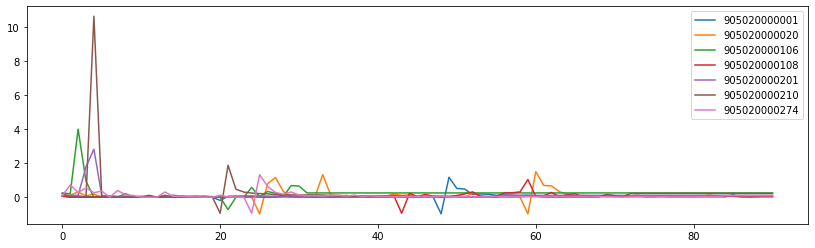

In [ ]:
# замена inf на NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)
# используем метод .transform(), чтобы заполнить значения NaN групповым средним
data = data.transform(lambda x: x.fillna(x.mean()))
data.plot(figsize=(14, 4)) #строим график чтобы визуально оценить выбросы

# Проверка применимости разных методов определения выбросов

## 1. Простейшие методы

In [ ]:
corr_matrix = data.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(np.bool))
high_corr = [
    column for column in lower.columns if any((lower[column] > 0.6)|(lower[column] < -0.6))
]
other_features = [col for col in data.columns if col not in high_corr and col!='quality']

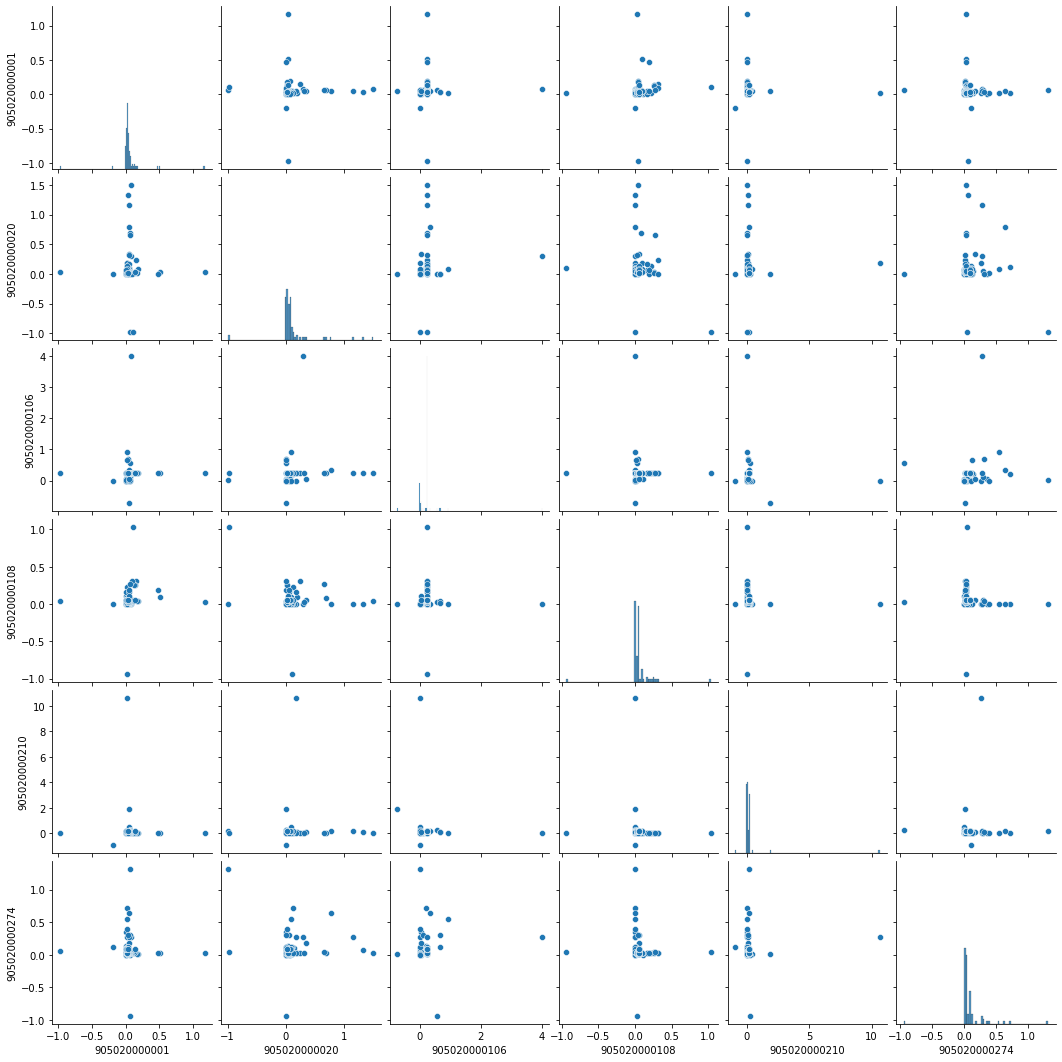

In [ ]:
sns.pairplot(data[other_features]);

## 3-сигмы

In [ ]:
def outlier_std(data, col, threshold=3):
    mean = data[col].mean()
    std = data[col].std()
    up_bound = mean + threshold * std
    low_bound = mean - threshold * std
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

In [ ]:
def get_column_outliers(data, columns=None, function=outlier_std, threshold=3):
    if columns:
        columns_to_check = columns
    else:
        columns_to_check = data.columns
        
    outliers = pd.Series(data=[False]*len(data), index=data_features.index, name='is_outlier')
    comparison_table = {}
    for column in columns_to_check:
        anomalies, upper_bound, lower_bound = function(data, column, threshold=threshold)
        comparison_table[column] = [upper_bound, lower_bound, sum(anomalies), 100*sum(anomalies)/len(anomalies)]
        outliers[anomalies[anomalies].index] = True
    
    comparison_table = pd.DataFrame(comparison_table).T
    comparison_table.columns=['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_percentage']
    
    return comparison_table, outliers

def anomalies_report(outliers):
    print("Total number of outliers: {}\nPercentage of outliers:   {:.2f}%".format(
            sum(outliers), 100*sum(outliers)/len(outliers)))    

In [ ]:
data_features = data.iloc[:, :-1]

In [ ]:
comparison_table, std_outliers = get_column_outliers(data_features)
anomalies_report(std_outliers)

Total number of outliers: 11
Percentage of outliers:   12.09%


In [ ]:
comparison_table

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
905020000001,0.588801,-0.489452,2.0,2.197802
905020000020,1.029064,-0.821919,5.0,5.494505
905020000106,1.554360,-1.055670,1.0,1.098901
905020000108,0.546027,-0.437666,2.0,2.197802
905020000201,1.135291,-0.925487,2.0,2.197802
905020000210,3.610553,-3.168246,1.0,1.098901


In [ ]:
#labeled_data = data_features.copy()
#labeled_data['is_outlier'] = std_outliers

#sns.pairplot(data=labeled_data[:-1], vars = other_features,
#             hue='is_outlier', hue_order=[1, 0],
#             markers=['x', 'o'],  palette='bright');

## Межквартильное отклонение

In [ ]:
def outlier_iqr(data, col, threshold=3):
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    up_bound = data[col].quantile(0.75) + (IQR * threshold)
    low_bound = data[col].quantile(0.25) - (IQR * threshold)
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

In [ ]:
comparison_table, iqr_outliers = get_column_outliers(data_features, function=outlier_iqr)
anomalies_report(iqr_outliers)

Total number of outliers: 46
Percentage of outliers:   50.55%


In [ ]:
comparison_table

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
905020000001,0.157628,-0.089622,7.0,7.692308
905020000020,0.271176,-0.165216,11.0,12.087912
905020000106,0.339642,0.128949,26.0,28.571429
905020000108,0.209039,-0.152298,8.0,8.791209
905020000201,0.408327,-0.299664,2.0,2.197802
905020000210,0.874418,-0.649866,3.0,3.296703


In [ ]:
#labeled_data = data_features.copy()
#labeled_data['is_outlier'] = iqr_outliers

#sns.pairplot(data=labeled_data, vars = other_features,
#             hue='is_outlier', hue_order=[1, 0],
#             markers=['x', 'o'],  palette='bright');

## 3. Кластеризация

## Distance-based

In [ ]:
from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist
from sklearn.preprocessing import RobustScaler

class DistanceOutliers(BaseEstimator):
    """
    Distance based outlier detector model
    
    Fit method calculates centroid of training samples and
    using `metric` get distances from centroid to train samples.
    Having distances - we calculate `threshold` based on `percentile`.
    
    Predict method uses `threshold` and `metric` to determine, whether
    distance to sample from centroid is too large -> outlier.
    
    -----------
    Parameters:
    
    - metric: string, default - euclidean
        metric to use for distance calculation (see scipy.spatial.distance.cdist)
        
    - percentile: float in range [0, 100]
        hyperparameter which sets the threshold for anomalies
    """
    def __init__(self, metric='euclidean', percentile=90):
        self.metric = metric
        self.percentile = percentile
        
    def fit(self, X):
        self.centroid = np.mean(X, axis=0).values.reshape(-1, 1).T
        distances_train = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        self.threshold = np.percentile(distances_train, self.percentile)
        
    def predict(self, X):
        distances = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        predictions = (distances > self.threshold).astype(int)
        return predictions

In [ ]:
scaler = RobustScaler()
scaled_data = pd.DataFrame(
    data=scaler.fit_transform(data_features), 
    columns=data_features.columns
)

In [ ]:
euclidian_model = DistanceOutliers(metric='euclidean', percentile=90)
euclidian_model.fit(scaled_data)
euclidian_outliers = euclidian_model.predict(scaled_data)
anomalies_report(euclidian_outliers)

Total number of outliers: 9
Percentage of outliers:   9.89%


## <center> Density-based </center>

## DBSCAN

https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/


![1.png](pictures/1.png)

**Алгоритм:**
- 1. Выбираем случайную точку и находим её соседей в заданной
окрестности
- 2. Если соседей меньше критического значения – называем выбросами
- 3. Если нет – объединяем в «плотный» кластер и повторяем поиск соседей
- 4. Если все плотные точки пройдены и помечены как посещенные – выбираем новую не посещенную точку и начинаем сначала

Повторяем, пока все точки не будут посещены


**Преимущества:**
- Density-based (плотностной/вероятностный) метод – умеет в сложные формы кластеров
- Поиск выбросов и аномалий в данных 

**Недостатки:**
- Довольно сложный в настройке – очень чувствителен к параметру ”плотности” epsilon

Идея - аномалии должны сильно отличаться от основных данных и скорее всего попадут в "шум". Почему бы не увеличивать epsilon до тех пор, пока все "плотные" данные не окажутся в нескольких немногочисленных кластерах, а шума будет столько, сколько мы подозреваем должно быть аномалий

In [ ]:
from sklearn.cluster import DBSCAN

# для начала считаем все наблюдения аномальными
outlier_percentage = 1.

num_clusters = []
anomaly_percentage = []

# берем маленький эпсилон и начинаем увеличивать
eps = 0.05
eps_history = [eps]
while outlier_percentage>0.1:    
    model = DBSCAN(eps=eps).fit(scaled_data)
    labels = model.labels_
    num_clusters.append(len(np.unique(labels))-1)
    labels = np.array([1 if label == -1 else 0 for label in labels])
    # считаем текущий процент "шума"
    outlier_percentage = sum(labels==1) / len(labels)    
    eps += 0.05
    eps_history.append(eps)
    anomaly_percentage.append(outlier_percentage)
    
model = DBSCAN(eps)
model.fit(scaled_data)
density_outlier = np.array([1 if label == -1 else 0 for label in model.labels_])

In [ ]:
anomalies_report(density_outlier)

Total number of outliers: 9
Percentage of outliers:   9.89%


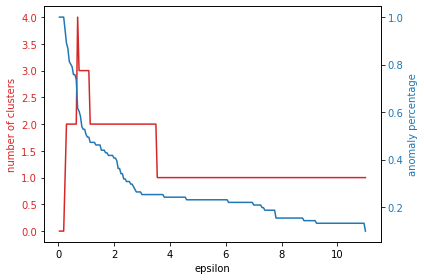

In [ ]:
iterations = eps_history[:-1]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epsilon')
ax1.set_ylabel('number of clusters', color=color)
ax1.plot(iterations, num_clusters, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('anomaly percentage', color=color)  # we already handled the x-label with ax1
ax2.plot(iterations, anomaly_percentage, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Unsupervised model-based

## <center>One-Class SVM</center>

## Коротко о Support Vector Machine

Если совсем вкратце, SVM - базовая линейная модель. Основная идея алгоритма (в случае с классификацией) - разделить классы гиперплоскостью так, чтобы максимизировать расстояние (зазор) между ними. Изначально алгоритм был способен работать только с линейно разделимыми классами, однако в 90-е годы прошлого века метод стал особенно популярен из-за внедрения "Kernel Trick" (1992), позволившего эффективно работать с линейно неразделимыми данными. 

![3.png](pictures/3.png)

## Kernel Trick

Ядро (kernel) - это функция, которая способна преобразовать признаковое пространство (в том числе нелинейно), без непосредственного преобразования признаков. 

Крайне эффективна в плане вычисления и потенциально позволяет получать бесконечноразмерные признаковые пространства. 

Идея заключается в том, что классы, линейно неразделимые в текущем признаковом пространстве, могут стать разделимыми в пространствах более высокой размерности:

![4.jpeg](pictures/4.jpeg)

## One Class SVM
http://rvlasveld.github.io/blog/2013/07/12/introduction-to-one-class-support-vector-machines/

One Class SVM - это одна из форм классического алгоритма, однако, как следует из названия, для его обучения нам достаточно иметь всего один класс, пусть даже и немного "зашумленный", при этом мы хотим научиться для каждого нового наблюдения принимать решение, является ли оно аномальным или нет.

Общая идея: преобразовать признаковое пространство и провести разделяющую гиперплоскость так, чтобы наблюдения лежали как можно дальше от начала координат:

![2.png](pictures/2.png)

В результате мы получаем границу, по одну сторону которой лежат максимально "плотные" и похожие друг на друга наблюдения из нашей тренировочной выборки, а по другую будут находится аномальные значения, не похожие на все остальные. Процент таких аномальных наблюдений, которые модель будет пытаться отделить от основной части выборки, мы снова задаём в самом начале обучения при помощи параметра `nu`

In [ ]:
from sklearn.svm import OneClassSVM

one_class_svm = OneClassSVM(nu=0.1, gamma='auto')
one_class_svm.fit(scaled_data)
svm_outliers = one_class_svm.predict(scaled_data)
svm_outliers = np.array([1 if label == -1 else 0 for label in svm_outliers])

In [ ]:
anomalies_report(svm_outliers)

Total number of outliers: 23
Percentage of outliers:   25.27%


## Плюсы и минусы

\+ Благодаря kernel trick, модель способна проводить **нелинейные разделяющие границы**

\+ Особенно удобно использовать, когда в данных недостаточно "плохих" наблюдений, чтобы использовать стандартный подход обучения с учителем - бинарную классификацию

\- Может очень сильно **переобучиться** и выдавать большое количество ложно отрицательных результатов, если разделяющий зазор слишком мал

## <center> Isolation Forest </center>

Идея - давайте посмотрим, насколько легко можно "изолировать" наблюдение от всех остальных. Если слишком легко, наверное она лежит далеко и является выбросом. Если очень тяжело - скорее всего она похожа на кучу других точек и выбросом не является. 

Алгоритм:
1. Select the point to isolate.
2. For each feature, set the range to isolate between the minimum and the maximum.
3. Choose a feature randomly.
4. Pick a value that’s in the range, again randomly:
    - If the chosen value keeps the point above, switch the minimum of the range of the feature to the value.
    - If the chosen value keeps the point below, switch the maximum of the range of the feature to the value.
5. Repeat steps 3 & 4 until the point is isolated. That is, until the point is the only one which is inside the range for all features.
6. Count how many times you’ve had to repeat steps 3 & 4. We call this quantity the isolation number.

https://quantdare.com/isolation-forest-algorithm/

In [ ]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, 
                                   max_features=1.0, bootstrap=True, behaviour="new")
isolation_forest.fit(scaled_data)

isolation_outliers = isolation_forest.predict(scaled_data)
isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


In [ ]:
anomalies_report(isolation_outliers)

Total number of outliers: 9
Percentage of outliers:   9.89%


# Финальное сравнение

In [ ]:
summary = np.concatenate((
    [std_outliers], 
    [iqr_outliers], 
    [euclidian_outliers], 
    #[cityblock_outliers],
    [density_outlier],
    [svm_outliers],
    [isolation_outliers]
))

In [ ]:
summary = pd.DataFrame(
    summary.T, 
    columns=['std', 'iqr', 'euclid', 'dbscan', 'svm', 'isolation']
)
summary.head()

,std,iqr,euclid,dbscan,svm,isolation
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,1,1,1,1,0,1
3,1,1,1,1,1,1
4,1,1,1,1,0,1


In [ ]:
summary.sum(axis=1).value_counts()

0    41
1    25
2    12
5     5
4     3
3     3
6     2
dtype: int64

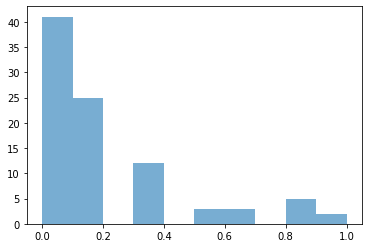

In [ ]:
outlier_score = summary.mean(axis=1)
plt.hist(outlier_score, alpha=0.6);